###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [3]:
df1 = pd.read_csv('G:\\Others\\Data Science - TYPE A\\Guvi\\Assignment\\Task 4\\college_1.csv')
df2 = pd.read_csv('G:\\Others\\Data Science - TYPE A\\Guvi\\Assignment\\Task 4\\college_2.csv')

In [4]:
df1.shape,df2.shape

((84, 7), (35, 9))

In [5]:
mer_df = pd.concat([df1,df2],axis=0)

In [6]:
mer_df

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
30,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
31,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
32,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
33,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


In [7]:
# Dropping null cols
mer_df = mer_df.drop(columns=['python_en','computational_thinking'])

In [8]:
#looking for categories
print(df1.mysql.unique())
print(df1.Department.unique())

print(df1.python.nunique())
print(len(df1['Previous Geekions'].unique()))

[ 20.   100.    47.     8.     0.     4.    50.    24.    11.25  12.
  35.    77.    86.25  39.    28.75   7.5   27.     3.75]
['Computer Science and Engineering'
 'Electronics and Communication Engineering'
 'Electronics and Electrical Engineering']
22
70


In [9]:
# Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 

cat1 = df1[df1['Department']=='Computer Science and Engineering']
cat2 = df1[df1['Department']=='Electronics and Communication Engineering']
cat3 = df1[df1['Department']=='Electronics and Electrical Engineering']

In [10]:
cat3.head()

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising
64,k.parvathi,100.0,100.0,260,260,Electronics and Electrical Engineering,0
71,m.keerthana,97.5,0.0,120,120,Electronics and Electrical Engineering,0
72,Subhashini,100.0,4.0,120,120,Electronics and Electrical Engineering,0
74,J.Bhuvaneshwari,100.0,20.0,100,100,Electronics and Electrical Engineering,0
75,santhosh,82.0,12.0,60,60,Electronics and Electrical Engineering,0


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [11]:
excd = mer_df[mer_df['CodeKata Score']>15000]
rchd = mer_df[(mer_df['CodeKata Score']>10000) & (mer_df['CodeKata Score'] <= 15000)]
needimp = mer_df[(mer_df['CodeKata Score']>7000) & (mer_df['CodeKata Score']<=10000)]
unsatis = mer_df[mer_df['CodeKata Score']<=700]

excd.to_csv('Exceeded expectations.csv')
rchd.to_csv('Reached_expectations.csv')
needimp.to_csv('Needs_Improvement.csv')
unsatis.to_csv('Unsatisfactory.csv')

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [12]:
prev_week = mer_df['Previous Geekions'].mean()
this_week = mer_df['CodeKata Score'].mean()

print("previous week:", prev_week)
print("this week:", this_week)
print("Difference:", this_week-prev_week)
print("mean:", (prev_week+this_week)/2)

previous week: 3842.3529411764707
this week: 4051.764705882353
Difference: 209.41176470588243
mean: 3947.0588235294117


###### No of students participated 

In [13]:
print(f"No of students participated:{mer_df.Name.nunique()}")

No of students participated:119


###### #Average completion of python course or my_sql or python english or computational thinking

In [14]:
print(f"average completion of mysql {mer_df.mysql.mean()}")

average completion of mysql 23.5


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [15]:
mer_df['rising'] = mer_df['CodeKata Score']-mer_df['Previous Geekions']

In [16]:
mer_df.sort_values('rising',ascending=False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,rising
8,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,3140
18,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,2000
2,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,2000


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [17]:
mer_df.sort_values('CodeKata Score',ascending=False).head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,rising
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,0
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,0
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,0


###### Department wise codekata performence (pie chart)

Department
Computer Science and Engineering             320025
Electronics and Communication Engineering    108335
Electronics and Electrical Engineering        53800
Name: CodeKata Score, dtype: int64


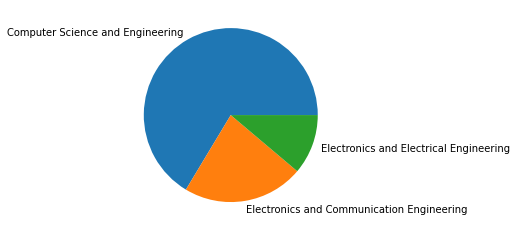

In [21]:
data = mer_df.groupby('Department')['CodeKata Score'].sum()
print(data)

plt.pie(data,labels=data.index)
plt.show()

In [22]:
data.index

Index(['Computer Science and Engineering',
       'Electronics and Communication Engineering',
       'Electronics and Electrical Engineering'],
      dtype='object', name='Department')

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [23]:
toppers = mer_df.sort_values("CodeKata Score", ascending=False).groupby('Department').first()

In [39]:
toppers

,Name,python,mysql,Previous Geekions,CodeKata Score,Rising,rising
Department,,,,,,,
Computer Science and Engineering,A.Dharani,82.0,20.0,24500,24500,0,0
Electronics and Communication Engineering,Bodipudi Harini,-1.0,35.0,10040,10040,0,0
Electronics and Electrical Engineering,ASHOK KUMAR K,100.0,31.0,19400,19400,0,0


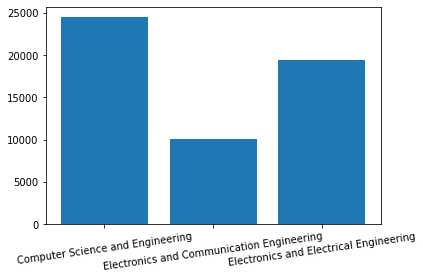

In [46]:
plt.bar(toppers.index, toppers['CodeKata Score'])
plt.xticks(rotation=8);

In [54]:
import plotly.express as px

fig = px.bar(x=toppers.index, y=toppers['CodeKata Score'], color = toppers['Name'],
             labels={'x':'Department','y':'Score'})
fig.show()